In [14]:
import pandas as pd								#load pandas
import numpy as np								#load bumpy
%matplotlib inline
import matplotlib.pyplot as plt						#Load image plotter
from sklearn.model_selection import train_test_split		#Load data splitter
from sklearn.ensemble import RandomForestClassifier		#Load Random Forest Classifier
np.random.seed(42)								#Set random seed
import random										#Load random
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix

In [3]:
#load datasets
train_df = pd.read_csv(r'Datasets/mnist_train.csv')
test_df = pd.read_csv(r'Datasets/mnist_test.csv')

print('Number of rows in Train Dataset: ' + str(train_df.shape[0]))
print('Number of columns in Train Dataset: ' + str(train_df.shape[1]))
print('Number of rows in Test Dataset: ' + str(test_df.shape[0]))
print('Number of columns in Test Dataset: ' + str(test_df.shape[1]))

Number of rows in Train Dataset: 60000
Number of columns in Train Dataset: 785
Number of rows in Test Dataset: 10000
Number of columns in Test Dataset: 785


In [4]:
#View first 5 rows of Train Dataset
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#View first 5 rows of Test Dataset
test_df[90:100]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


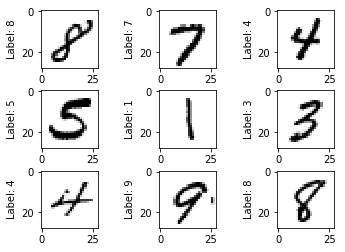

In [82]:
#randomic image samples
def plotNum(ind):
    plt.imshow(np.reshape(np.array(train_df.iloc[ind,1:]), (28, 28)) ,cmap='binary')
    plt.ylabel('Label: ' + str(train_df.iloc[ind, 0]))

#select 9 random items in the table
random_line = random.sample(range(1,len(train_df)),9)

#display the 9 images in a subplot
counta = 0
for img in random_line:
    counta = counta+1
    plt.subplots_adjust(hspace=0.4)
    plt.subplot(3,3,counta)
    plotNum(img)

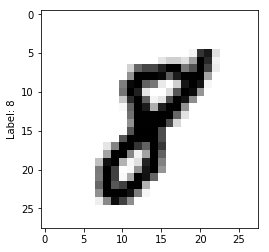

In [96]:
plotNum(17) #plot a single image

In [5]:
# split the training and testing data 
# into X (image) and Y (label)
x_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]

x_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]


# split the training data into train and validate arrays
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

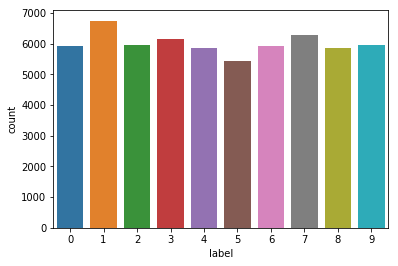

In [11]:
g = sns.countplot(train_df["label"])
train_df["label"].value_counts()

In [6]:
#call the Random Forest Classifier 
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#rfclass = RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10, n_jobs=10, n_estimators=200, random_state=42, verbose=1)
rfclass = RandomForestClassifier(n_jobs=4, n_estimators=300, random_state=42, verbose=1)

#fit the data
rfclass.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   25.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   38.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=4,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [7]:
#classifier score
confidence = rfclass.score(x_validate, y_validate)
print(confidence)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s


0.9693333333333334


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.0s finished


In [9]:
#predict the split test data
predictions = rfclass.predict(x_validate)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.8s finished


In [13]:
#create a confusion matrix
confusion_matrix = pd.crosstab(y_validate, predictions, rownames=['Actual Numbers'], 
            colnames=['Predicted Numbers'])
confusion_matrix

Predicted Numbers,0,1,2,3,4,5,6,7,8,9
Actual Numbers,,,,,,,,,,
0,1157,0,1,1,3,2,4,0,5,2
1,0,1304,8,4,3,0,1,1,0,1
2,1,7,1144,4,3,0,3,7,4,1
3,3,0,16,1160,0,12,1,7,12,8
4,2,0,1,0,1141,0,5,3,1,23
5,6,2,1,11,2,1063,6,0,11,2
6,4,0,1,0,3,7,1157,0,5,0
7,1,10,14,1,5,0,0,1252,5,11
8,1,3,6,8,8,8,3,1,1119,3


In [89]:
#classifier score for test data
confidence = rfclass.score(x_test, y_test)
print(confidence)

#predict the test data
test_predictions = rfclass.predict(x_test)

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s


0.9686


[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.5s finished


In [75]:
#create a confusion matrix
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual Numbers'], 
            colnames=['Predicted Numbers'])
confusion_matrix

Predicted Numbers,0,1,2,3,4,5,6,7,8,9
Actual Numbers,,,,,,,,,,
0,972,1,0,0,0,1,3,1,2,0
1,0,1132,0,1,0,1,1,0,0,0
2,2,0,1012,3,2,1,3,6,3,0
3,0,0,7,987,0,3,0,8,4,1
4,0,0,2,0,964,0,3,0,2,11
5,1,0,0,2,4,879,3,1,2,0
6,3,3,1,0,1,0,947,0,3,0
7,0,3,11,1,2,0,0,1002,2,7
8,1,0,1,4,4,2,1,3,953,5


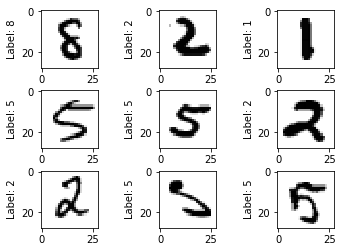

In [42]:
#randomic image samples
def plotNum2(ind):
    plt.imshow(np.reshape(np.array(test_df.iloc[ind,1:]), (28, 28)) ,cmap='binary')
    plt.ylabel('Label: ' + str(test_df.iloc[ind, 0]))

#select 9 random items in the table
random_line = random.sample(range(1,len(test_df)),9)

#display the 9 images in a subplot
countb = 0
for img in random_line:
    countb = countb+1
    plt.subplots_adjust(hspace=0.4)
    plt.subplot(3,3,countb)
    plotNum2(img)

Confusion matrix, without normalization
[[1157    0    1    1    3    2    4    0    5    2]
 [   0 1304    8    4    3    0    1    1    0    1]
 [   1    7 1144    4    3    0    3    7    4    1]
 [   3    0   16 1160    0   12    1    7   12    8]
 [   2    0    1    0 1141    0    5    3    1   23]
 [   6    2    1   11    2 1063    6    0   11    2]
 [   4    0    1    0    3    7 1157    0    5    0]
 [   1   10   14    1    5    0    0 1252    5   11]
 [   1    3    6    8    8    8    3    1 1119    3]
 [   5    2    5   11   13    3    2   11    7 1135]]


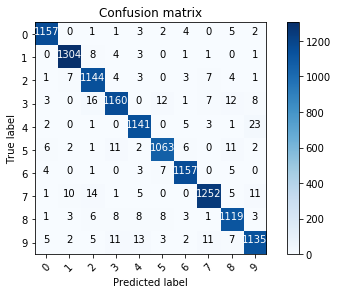

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validate, predictions)
np.set_printoptions(precision=2)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes = range(10))